In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
# データ生成
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, n_samples=300)

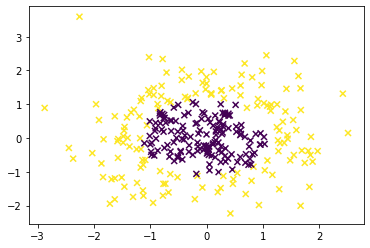

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='x', c=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9555555555555556

# KMeans法で表現できるかを実験
# たぶんできないはず、同心円状のものはクラスタリングは
# 対応できないはず、中心点を設定すると、2つの重心が重なってしまうから

In [19]:
from sklearn.cluster import KMeans
import pandas as pd

In [20]:
model = KMeans(n_clusters=2)
model.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
print(model.labels_)
print(model.cluster_centers_)

[0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1
 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1
 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0
 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 1]
[[-0.88989204  0.06441203]
 [ 0.66353338  0.14307754]]


In [23]:
df = pd.DataFrame(X)

In [24]:
df['class']=model.fit_predict(df)

In [25]:
df.head()

,0,1,class
0,-0.723396,0.451250,1
1,-1.566395,-0.030984,1
2,-2.873671,0.890410,1
3,-1.189462,0.640186,1
4,-0.938128,1.272965,1


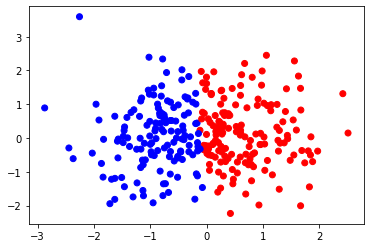

In [31]:
X1 = df[0]
Y1 = df[1]

color_codes = {0:'red', 1:'blue'}
colors = [color_codes[x] for x in model.labels_]

plt.scatter(X1, Y1, color=colors)

In [ ]:
結果はやはり同心円状のクラス分けにはならず、左と右に分かれる形になった。
同心円状はKMeansからすると、わかりづらい分け方になる。